In [32]:
import pandas as pd

In [33]:
df = pd.read_csv("play_tennis_train.csv")

In [34]:
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [35]:
inputs=df.drop('play',axis='columns')
inputs

,day,outlook,temp,humidity,wind
0,D1,Sunny,Hot,High,Weak
1,D2,Sunny,Hot,High,Strong
2,D3,Overcast,Hot,High,Weak
3,D4,Rain,Mild,High,Weak
4,D5,Rain,Cool,Normal,Weak
5,D6,Rain,Cool,Normal,Strong
6,D7,Overcast,Cool,Normal,Strong
7,D8,Sunny,Mild,High,Weak
8,D9,Sunny,Cool,Normal,Weak
9,D10,Rain,Mild,Normal,Weak


In [36]:
from sklearn.preprocessing import LabelEncoder
le_outlook = LabelEncoder()
le_temp = LabelEncoder()
le_humidity = LabelEncoder()
le_wind = LabelEncoder()

In [37]:
inputs['outlook_n']=le_outlook.fit_transform(inputs['outlook'])
inputs['temp_n']=le_temp.fit_transform(inputs['temp'])
inputs['humidity_n']=le_humidity.fit_transform(inputs['humidity'])
inputs['wind_n']=le_wind.fit_transform(inputs['wind'])

In [38]:
inputs

,day,outlook,temp,humidity,wind,outlook_n,temp_n,humidity_n,wind_n
0,D1,Sunny,Hot,High,Weak,2,1,0,1
1,D2,Sunny,Hot,High,Strong,2,1,0,0
2,D3,Overcast,Hot,High,Weak,0,1,0,1
3,D4,Rain,Mild,High,Weak,1,2,0,1
4,D5,Rain,Cool,Normal,Weak,1,0,1,1
5,D6,Rain,Cool,Normal,Strong,1,0,1,0
6,D7,Overcast,Cool,Normal,Strong,0,0,1,0
7,D8,Sunny,Mild,High,Weak,2,2,0,1
8,D9,Sunny,Cool,Normal,Weak,2,0,1,1
9,D10,Rain,Mild,Normal,Weak,1,2,1,1


In [39]:
inputs_n=inputs.drop(['day','outlook','temp','humidity','wind'],axis='columns')

In [40]:
inputs_n

,outlook_n,temp_n,humidity_n,wind_n
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [41]:
target=df['play']
target

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: play, dtype: object

In [42]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion='entropy',random_state=0)

In [43]:
model.fit(inputs_n, target)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [44]:
model.score(inputs_n,target)

1.0

In [45]:
model.predict([[2,1,0,1]])

C:\Users\vikash\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [46]:
model.predict([[2,0,0,0]])

C:\Users\vikash\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [47]:
model.predict([[0,1,0,1]])

C:\Users\vikash\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

[Text(0.4444444444444444, 0.9, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.38888888888888884, 0.8, 'True  '),
 Text(0.5555555555555556, 0.7, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.5, 0.8, '  False'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'x[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'x[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalu

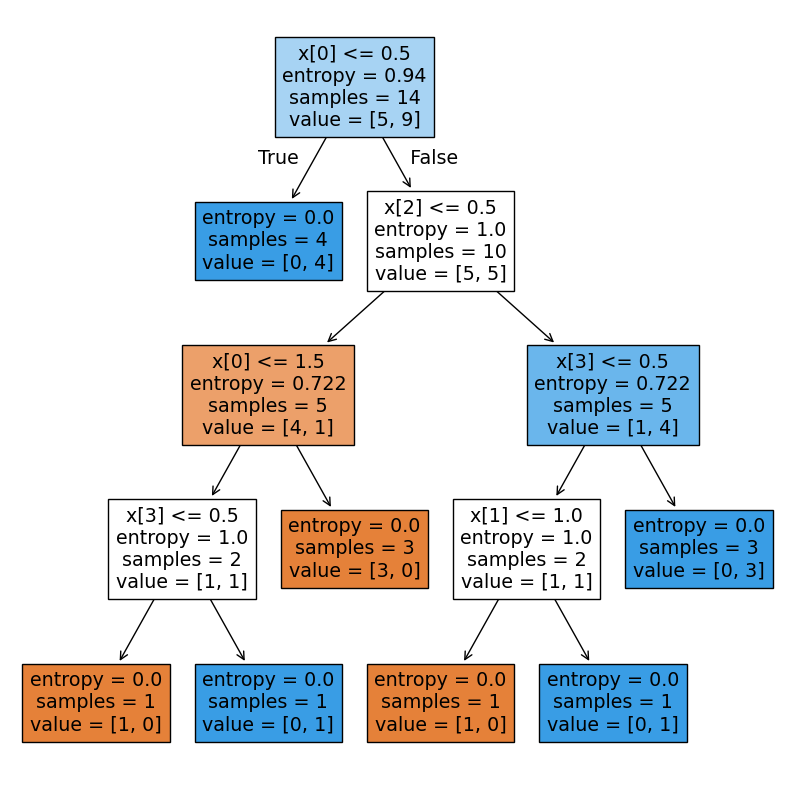

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(model,filled=True)
#tree.plot_tree(model)

In [49]:
print(tree.export_text(model))

|--- feature_0 <= 0.50
|   |--- class: Yes
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: No
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: Yes
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: No
|   |--- feature_2 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_1 <= 1.00
|   |   |   |   |--- class: No
|   |   |   |--- feature_1 >  1.00
|   |   |   |   |--- class: Yes
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: Yes



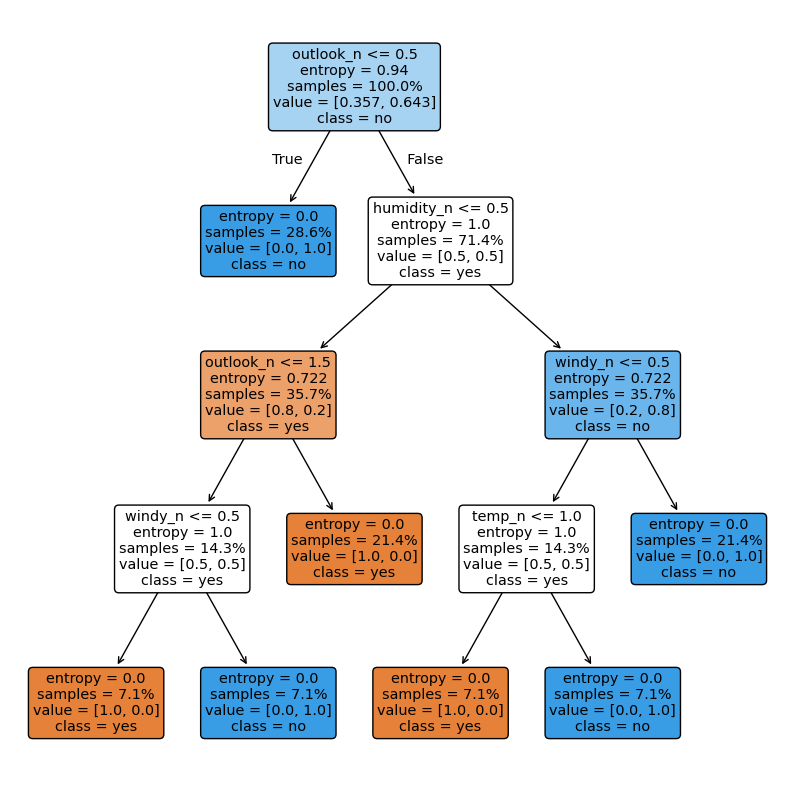

In [50]:
plt.figure(figsize=(10,10))
feature_cols = ['outlook_n','temp_n','humidity_n','windy_n']
tree.plot_tree(model,
               class_names=['yes','no'],
               filled=True,
               rounded=True,
               proportion=True,
               feature_names=feature_cols, max_depth=8)
plt.show()

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test= train_test_split(inputs_n,target,test_size=0.2,random_state=110)

In [53]:
len(x_train)

11

In [54]:
len(x_test)

3

In [55]:
from sklearn import metrics

In [56]:
#create decision tree classifier
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=0)

clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [57]:
#training score
clf.score(x_train,y_train)

1.0

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6666666666666666


In [59]:
feature_cols = ['outlook_n','temp_n','humidity_n', 'wind_n']

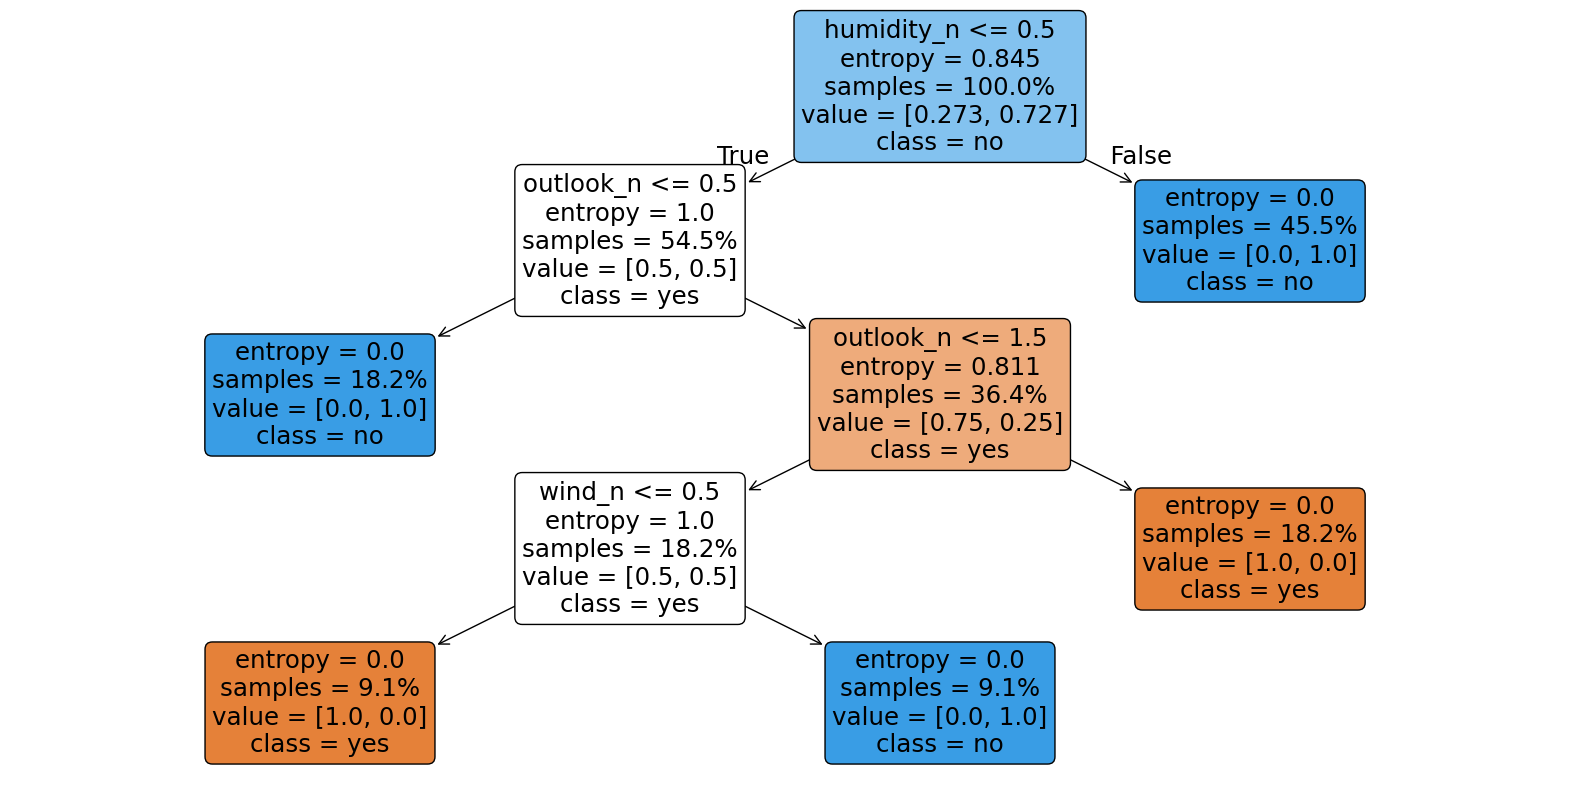

In [60]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf,
               class_names=['yes','no'],
               filled=True,
               rounded=True,
               proportion=True,
               feature_names=feature_cols, max_depth=8)
plt.show()